# Data set de modas 
implementado con ayuda de Tensorflow

In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.0


Los datos de Fashion MNIST estan disponibles directamente en la API de conjuntos de datos de `tf.keras`
Y se cargan de la siguiente manera

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

Llamar a `load_data`
En este objeto nos dara dos conjuntos con los valores de entrenamiento y prueba para los graficos que contienen las prendas y sus etiquetas

In [3]:
(training_images, training_labels), (test_images, test_labels) = fashion_mnist.load_data()

Visualizacion de los valores
Se imprime una imagen de entrenamiento y una etiqueta de entrenamiento para ver

Label:  0
Matrix:  [[  0   0   0   0   0   0   0   0   0   0 120  54   0   0   0   0  13 124   0   0   0   0   2   0   0   0   0   0]
 [  0   0   0   0   0   0   0  64 173 207 218 206 232 184 168 202 205 218 202 126  12   0   0   1   0   0   0   0]
 [  0   0   0   0   0  56 199 223 222 207 205 211 223 227 231 230 214 203 209 220 213 164   0   0   2   0   0   0]
 [  0   0   0   0   0 191 219 200 200 206 206 205 206 206 203 202 201 202 201 195 198 222 149   0   0   0   0   0]
 [  0   0   0   0  72 224 201 205 208 202 204 204 205 205 208 205 192 188 203 202 200 189 198  23   0   0   0   0]
 [  0   0   0   0 160 221 211 200 204 203 204 203 201 202 201 203 201 185 203 203 188 194 207 126   0   0   0   0]
 [  0   0   0   0 227 212 224 205 201 204 203 202 202 201 201 200 201 195 198 191 182 199 202 202   0   0   0   0]
 [  0   0   0  20 208 205 224 219 201 200 202 202 201 201 199 198 199 199 197 183 195 210 191 189  11   0   0   0]
 [  0   0   0 138 223 201 218 229 216 202 202 200 200 197 197

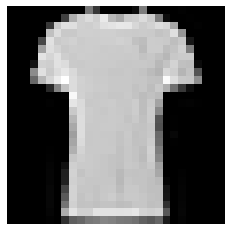

In [4]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(linewidth = 200)

# Establecer el indice de la imagen que se visualizara
img_index = 5999 #6000 -1

# Visualizacion
plt.imshow(training_images[img_index], cmap = 'gray')
plt.axis(False)

print('Label: ', training_labels[img_index])
print('Matrix: ', training_images[img_index])

# Preparacion de los datos
todos los valores se encuentran en un rango de 0 - 255. Se esta entrenando una red neuronal, por varias razones es mas facil si tranformamos los valores para tratar con valores entre 0 y 1. Este proceso es llamado `Normalizacion`

In [5]:
# Actualizamos la variable dividiendo los valores originales entre 255
training_images = training_images/ 255.0
test_images = test_images / 255.0

Label:  0
Matrix:  [[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.47058824 0.21176471 0.         0.         0.         0.         0.05098039
  0.48627451 0.         0.         0.         0.         0.00784314 0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.25098039 0.67843137 0.81176471 0.85490196 0.80784314 0.90980392 0.72156863 0.65882353 0.79215686 0.80392157
  0.85490196 0.79215686 0.49411765 0.04705882 0.         0.         0.00392157 0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.21960784 0.78039216 0.8745098  0.87058824 0.81176471 0.80392157 0.82745098 0.8745098  0.89019608 0.90588235 0.90196078 0.83921569
  0.79607843 0.81960784 0.8627451  0.83529412 0.64313725 0.         0.         0.00784314 0.         0.         0.        ]
 [0.         0.         0.         0.     

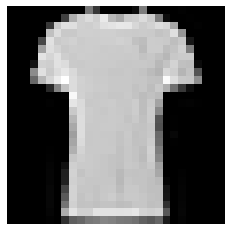

In [6]:
# Verificamos si esta cargando los valores de forma correcta
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(linewidth=200)

img_index = 5999

plt.imshow(training_images[img_index], cmap='gray')
plt.axis(False)

print('Label: ', training_labels[img_index])
print('Matrix: ', training_images[img_index])

In [7]:
training_images[5999].shape

(28, 28)

### Creacion del Modelo

In [8]:
mlp_model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    # Busca la mayor ocurrencia para cada conjunto de procutos del dataset
    # devuelve la probabilidad de que cada valor pertenezca a una clasede las etiquetas (10 en total)
    tf.keras.layers.Dense(10, activation='softmax')
])

### Entrenamiento del modelo

In [9]:
mlp_model.compile(
    optimizer=tf.optimizers.SGD(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [11]:
mlp_model.fit(training_images, training_labels, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7249 - accuracy: 0.7676
Epoch 2/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5073 - accuracy: 0.8275
Epoch 3/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4634 - accuracy: 0.8409


In [13]:
mlp_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (32, 784)                 0         
                                                                 
 dense (Dense)               (32, 256)                 200960    
                                                                 
 dense_1 (Dense)             (32, 10)                  2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


### Evaluacion del modelo

In [14]:
mlp_model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.4734 - accuracy: 0.8379


[0.4733993113040924, 0.8378999829292297]

Label: 9
Prediction: 9


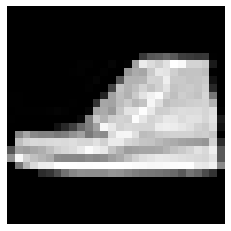

In [17]:
import random 

test_index = random.randint(0, 10_000 - 1)

plt.imshow(test_images[test_index], cmap='gray')
plt.axis(False)

print(f'Label: {test_labels[test_index]}')
input_image = np.reshape(test_images[test_index], (1, 784))
prediction = mlp_model.predict(np.expand_dims(input_image, axis=-1))
print(f'Prediction: {np.argmax(prediction)}')

In [16]:
prediction

array([[1.8062933e-03, 1.9794963e-03, 9.5192599e-01, 3.1350274e-04, 3.3771098e-02, 3.7270183e-06, 1.0037145e-02, 8.7923503e-08, 1.6218197e-04, 3.7908532e-07]], dtype=float32)

### Convoluciones

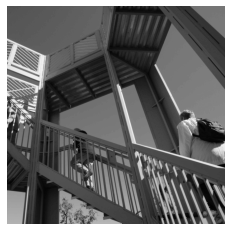

In [18]:
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt

# Cargar una imagen como muestra
img = misc.ascent()

plt.imshow(img, cmap='gray')
plt.grid(False)
plt.axis('off')
plt.show()

In [19]:
# Copia de la imagen para trabajar con ella
img_transformed = np.copy(img)
size_x = img_transformed.shape[0]
size_y = img_transformed.shape[1]

In [20]:
filter = [
    [1, 2, 1],
    [2, 4, 2], 
    [1, 2, 1]
]

weight = 1/8

In [21]:
# convolucion a mano
for x in range (1, size_x -1):
    for y in range(1, size_y -1):
        convolution = 0.0
        convolution = convolution + (img[x - 1, y - 1]      * filter [0][0])
        convolution = convolution + (img[x    , y - 1]      * filter [0][1])
        convolution = convolution + (img[x + 1, y - 1]      * filter [0][2])

        convolution = convolution + (img[x - 1, y]          * filter [1][0])
        convolution = convolution + (img[x    , y]          * filter [1][1])
        convolution = convolution + (img[x +1 , y]          * filter [1][2])

        convolution = convolution + (img[x - 1, y + 1]      * filter [2][0])
        convolution = convolution + (img[x    , y + 1]      * filter [2][1])
        convolution = convolution + (img[x + 1, y + 1]      * filter [2][2])

        convolution = convolution * weight

        if convolution < 0:
            convolution = 0

        if convolution > 255:
            convolution = 255

        img_transformed[x, y] = convolution

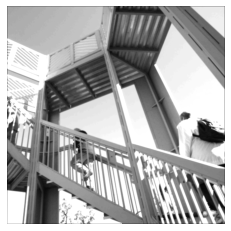

In [22]:
plt.imshow(img_transformed, cmap='gray')
plt.grid(False)
plt.axis('off')
plt.show()

### Creacion del modelo
Para este modelo se agregaran algunas capas convolucionales
Como inspiracion se puede recrear LeNet5 de Yann LeCun

<img src="https://miro.medium.com/max/4348/1*PXworfAP2IombUzBsDMg7Q.png">

In [24]:
# Usando capas en keras
cnn_model = tf.keras.models.Sequential([

    # Primera capa convolucional + subsampleo
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Segunda capa convolucional 
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Tercera capa
    tf.keras.layers.Flatten(),

    # Cuarta capa 
    tf.keras.layers.Dense(128, activation='relu'),

    # Quinta capa
    tf.keras.layers.Dense(10, activation='softmax')
])

### Entrenamiento del modelo

In [31]:
cnn_model.compile(
    optimizer = tf.optimizers.SGD(),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [27]:
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [34]:
cnn_model.fit(training_images, training_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.4599 - accuracy: 0.8329
Epoch 2/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.4181 - accuracy: 0.8478
Epoch 3/10
1875/1875 [==============================] - 40s 22ms/step - loss: 0.3889 - accuracy: 0.8593
Epoch 4/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.3675 - accuracy: 0.8658
Epoch 5/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.3491 - accuracy: 0.8733
Epoch 6/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.3366 - accuracy: 0.8773
Epoch 7/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.3240 - accuracy: 0.8823
Epoch 8/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.3145 - accuracy: 0.8849
Epoch 9/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.3055 - accuracy: 0.8883
Epoch 10/10
1875/1875 [==============================] - 38s 20m

### Evaluacion del modelo


In [35]:
cnn_model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 6ms/step - loss: 0.3497 - accuracy: 0.8721


[0.3497280478477478, 0.8720999956130981]

### Prediccion


Label: 9
Prediction : 7


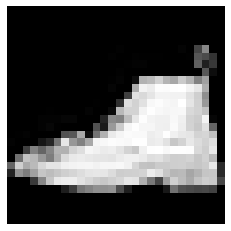

In [37]:
import random 

test_index = random.randint(1, 10_000 -1)

plt.imshow(test_images[test_index], cmap='gray')
plt.axis(False)

print(f'Label: {test_labels[test_index]}')
input_image = np.reshape(test_images[test_index], (1, 28, 28, 1))
prediction = cnn_model.predict(input_image)
print(f'Prediction : {np.argmax(prediction)}')

### Guardar el modelo

In [38]:
cnn_model.save('path_to_my_model.h5')

### Recrear exactamente el mismo modelo solo desde el archivo 


In [ ]:
new_model = keras.models.load_model('path_to_my_model.h5')
